# **CS539: Machine Learning**

# **Prof. Ricky Sethi**

# **Abstract:**

 This project focuses on predicting the success of football players at new clubs using machine learning, leveraging historical performance data, team metrics, and transfer values. By examining key player statistics like goals, assists, passes, etc alongside team factors such as possession and progressive passes, the study aims to identify patterns that drive player performance. Initial regression models have shown moderate predictive power, uncovering insights like the impact of midfield support on forwards' effectiveness, Aggressive tackles by players to help in defence and ball possession impact on overall team performance. Feature Engineering includes advanced feature engineering to compute composite score of a player using various performance features. Future improvements include testing non-linear models like Random Forest and Gradient Boosting, and implementing regularization techniques to address overfitting. Evaluation metrics such as MSE, R-squared, and F1 score will be used to validate the models. These findings will inform better decision-making for football clubs in assessing player transfers and predicting future success

# **Overview and Motivation:**

The world of Football(soccer) is continuously evolving. A new generation of athletes come up every year and we see teams fighting each other on the field as well as in the market to land their hands on these generational talents. For a club to succeed, the way they spend their money on new players is essential. Clubs need to make informed decisions on whether to invest in a player based on their transfer value, performances and winnings. They want to know which factors are most predictive of a player's success at a new club.
As a football fan it was interesting to see how successful clubs manage their resources and acquire players that help them stay at the top of their league. Although the old-fashioned method of scouting players from youth leagues is still quite effective, we can raise the likelihood of success by using a machine learning methodology.

Application of Machine Learning and Data Analysis Principles:

•	Exploratory data analysis: Compute summary of statistics for key features like player value, goals scored, assists, and performance ratings.

•	Data Distribution: Use plots to visualize the distribution of numeric features like transfer fees, goals, assists, and performance ratings.

•	Performance Metrics by Club: Analyze performance metrics (goals, assists) by club to see if there are significant differences in player success depending on the club.

•	Performance Over Time: Creating line plots to show how player performance metrics evolve over time. This can reveal trends and patterns related to player success or decline.

•	Transfer Trends: Plot transfer fees against performance metrics (goals, assists) to analyze if higher transfer fees correlate with better performance.

•	Performance Metrics by Competition: Use plots to compare performance metrics across different leagues or competitions. This helps us understand if players perform differently based on the competition's level.


# **Data:**

**# Data Sources:**
**Transfermarkt Data:**

Sourced from Kaggle, this dataset provides valuable information on player transfer values, historical transfer records, and other player-specific attributes.
The dataset includes features such as transfer fees, player age, position, and the clubs involved in transfers.

**Player and Team Performance Data: FBref**

Scraped from **FBref**, a comprehensive football statistics platform.

This dataset includes detailed player and team performance metrics across various leagues, such as:
Player-specific metrics: Goals, assists, xG (expected goals), minutes played, and performance ratings.

Team-specific metrics: Possession, progressive passes, defensive actions, and xG.

**Scraping Method:**
Tool Used: Beautiful Soup (Python library).
Process:
League-specific pages (e.g., La Liga, Bundesliga) were accessed for multiple seasons.
Performance tables for players and teams were identified and parsed into structured data.
Data was iteratively extracted for all required seasons to ensure comprehensive coverage.

**# Data Cleanup:**

To ensure the quality of the data, several data preprocessing steps were undertaken:

1.  Handling Missing Values: For any missing or blank values in the dataset, a value of 0 was imputed. In fields representing a numerical stat e.g., zero goals or assists rather than an absence of data, I put 0 in these places. This approach allowed for a complete dataset without introducing any unintended distortions.
2.  Missing columns due to unavailability of data: The data was collected for the past decade, some columns were only present in the newer data, reflecting recent additions to football metrics. After evaluating their relevance to the analysis, these columns were removed to maintain consistency across the dataset. This decision ensured that these columns did not skew or impact the exploratory data analysis.
3.  Standardizing player positions by refining terms that were either incorrect or overly specific. For instance, I replaced "left center midfielder" with the more standardized "central midfielder" and combined positions like "back midfielder" and "defensive midfielder" under "central defensive midfielder". These adjustments ensured consistency across data, supporting a more accurate analysis of player roles.
4.  Imputation strategies were applied where appropriate: Mean imputation was used for minutes played where data was missing.

# **Final Research Question:**

Machine learning model to predict the success of football teams in a league based on performance metrics such as possession, expected goals, defensive actions, and other team-specific data, while also considering how player transfers impact a team's overall performance? Specifically, which team and player performance metrics are most strongly correlated with a team’s success, and how does the addition or departure of a player influence a team's future performance?



# **Exploratory Data Analysis:**

1.  Analysed the number of foreign players in each league and came to the conclusion that richer leagues like the English Premier league often had more foreign players. Additionally, leagues in countries with smaller populations, where players may hold multiple nationalities—such as Scotland, Belgium, and Portugal—also showed an increased presence of foreign players. This trend highlights how league wealth and nationality policies impact player demographics.
2.  I identified the top 10 highest transfer fees and found out that attackers and attacking midfielders tend to command the highest market values. This reflects the premium placed on players who contribute directly to goal-scoring and offensive play.
3.  I analyzed the players with the most goals and assists, noting that their market values were also among the highest, reflecting the premium placed on offensive contributions in transfer markets
4.  I analyzed the players with the most yellow and red cards and found that central defenders tended to accumulate the most disciplinary penalties.
5.  I analyzed the trend in the market valuation of Vinícius Júnior, considered the best player in the world, and observed how his transfer value increased over time, particularly as he won major tournaments and achieved significant success with his club.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
url="/content/drive/MyDrive/Kaggle football dataset"
appearances=pd.read_csv(url+"/appearances.csv")
club_games=pd.read_csv(url+"/club_games.csv")
clubs=pd.read_csv(url+'/clubs.csv')
competitions=pd.read_csv(url+'/competitions.csv')
game_events=pd.read_csv(url+'/game_events.csv')
game_lineups=pd.read_csv(url+'/game_lineups.csv')
games=pd.read_csv(url+'/games.csv')
player_valuations=pd.read_csv(url+'/player_valuations.csv')
players=pd.read_csv(url+'/players.csv')
transfers=pd.read_csv(url+'/transfers.csv')



In [ ]:
LaLigaSquadStats = {}
LaLigaStandings = {}
LaLigaPassing = {}
LaLigaDefence = {}
LaLigaPossession = {}
LaLigaGoalShot = {}
LaLigaGoalkeeping = {}
season = ['2023-2024', '2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018',
          '2016-2017', '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012', '2010-2011', '2009-2010']

scrapeoutputurl = "/content/drive/MyDrive/Scrape_output/"

LaLigaURL = pd.read_csv("/content/drive/MyDrive/FBref_all_links_csv/Fbref_laliga_stats_url.csv")
for url in LaLigaURL:
    k = url.rfind("/")
    file_name = url[k+1:]
    file_path = scrapeoutputurl +"LaLiga/" + file_name + ".xlsx"
    year = file_name.split("-La-Liga-Stats")[0]
    season.append(year)
    # Read all sheets
    all_sheets_dict = pd.read_excel(file_path, sheet_name=None)

    # Append relevant sheets to their respective lists
    if "Squad" in all_sheets_dict:
        #LaLigaSquadStats.append(all_sheets_dict["Squad"])
        LaLigaSquadStats[year] = all_sheets_dict["Squad"]
    if "Standings" in all_sheets_dict:
        LaLigaStandings[year] = all_sheets_dict["Standings"]
    if "Passing" in all_sheets_dict:
        LaLigaPassing[year] = all_sheets_dict["Passing"]
    if "Defence" in all_sheets_dict:
        LaLigaDefence[year] = all_sheets_dict["Defence"]
    if "Possession" in all_sheets_dict:
        LaLigaPossession[year] = all_sheets_dict["Possession"]
    if "Goal Shot" in all_sheets_dict:
        LaLigaGoalShot[year] = all_sheets_dict["Goal Shot"]
    if "Goalkeeping" in all_sheets_dict:
        LaLigaGoalkeeping[year] = all_sheets_dict["Goalkeeping"]


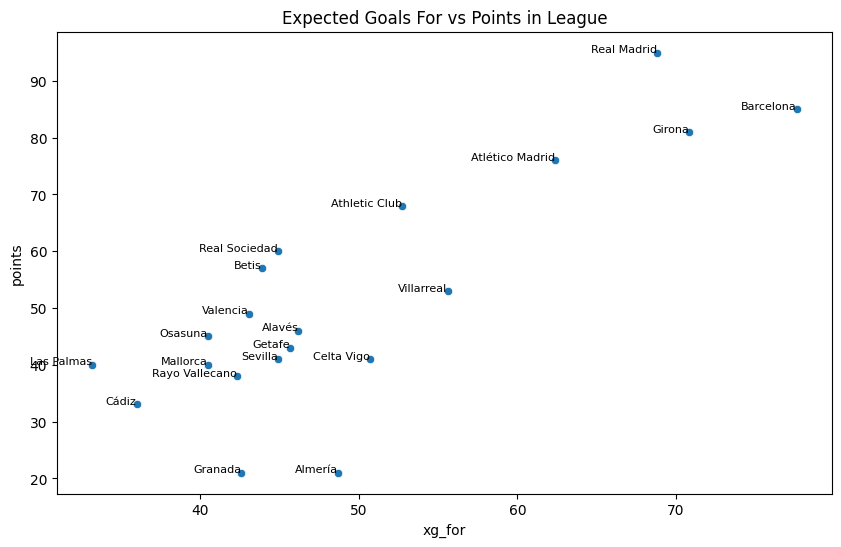

In [ ]:
season_key = '2023-2024'
standings_df = LaLigaStandings[season_key]
# Scatter plot of xG for vs. Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xg_for', y='points', data=standings_df)

for i in range(len(standings_df)):
    plt.text(standings_df['xg_for'][i], standings_df['points'][i], standings_df['team'][i],
             horizontalalignment='right', size=8, color='black')

plt.title('Expected Goals For vs Points in League')
plt.show()

In [ ]:
 #Combine data for all seasons into one dataframe
combined_standings = pd.concat(LaLigaStandings.values(), ignore_index=True)
if {'xg_for', 'points'}.issubset(combined_standings.columns):
    # Calculate the correlation between 'xg_for' and 'points'
    correlation = combined_standings[['xg_for', 'points']].corr()
    print(correlation)
else:
    print("'xg_for' and 'points' columns are missing in the combined data.")

          xg_for    points
xg_for  1.000000  0.763936
points  0.763936  1.000000


**Conclusion:** This is a strong correlation, suggesting that "xG for" is a good predictor of the number of points a team earns. However, it's not a perfect correlation (which would be 1), meaning there are other factors affecting a team's point tally beyond just "xG for."

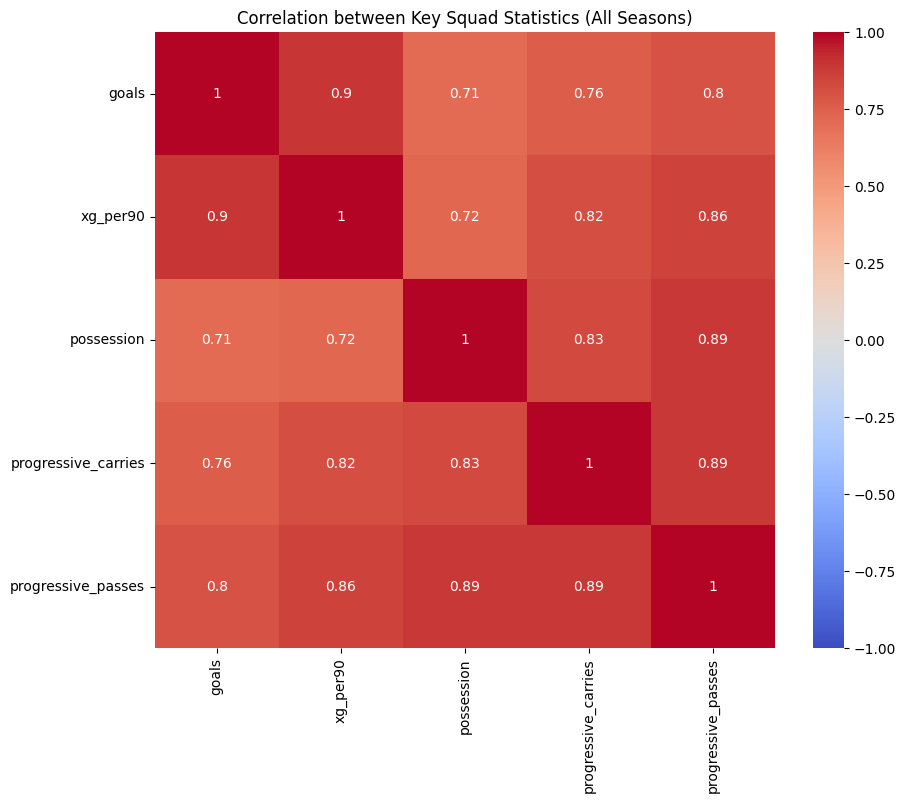

In [ ]:
combined_data = pd.DataFrame()

# Iterate over all seasons in LaLigaSquadStats dictionary
for season, data in LaLigaSquadStats.items():
    data['season'] = season  # Add a column for the season to distinguish data
    combined_data = pd.concat([combined_data, data], axis=0, ignore_index=True)

cols_for_corr = ['goals', 'xg_per90', 'possession', 'progressive_carries', 'progressive_passes']

# Make sure the columns exist in the data before calculating the correlation
combined_data = combined_data[combined_data[cols_for_corr].notna().all(axis=1)]

# Calculate the correlation matrix
correlation_matrix = combined_data[cols_for_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation between Key Squad Statistics (All Seasons)')
plt.show()

Key Findings from the Correlation Matrix:

**goals and xg_per90:** There is a strong positive correlation (0.897), meaning that teams that score more goals tend to have higher expected goals per 90 minutes. This is expected since xG is a metric that predicts goal-scoring based on shot quality.

**xg_per90 and progressive_passes:** There is a strong positive correlation (0.858), suggesting that teams with higher expected goals per 90 minutes tend to also make more progressive passes, which are key to advancing the ball and creating goal-scoring opportunities.

**goals and possession:** A moderate positive correlation (0.711), indicating that teams with more possession tend to score more goals. This makes sense, as teams that control possession can create more opportunities.

**progressive_carries and progressive_passes:** A very strong positive correlation (0.890), meaning that teams who make more progressive carries (carrying the ball forward) also tend to make more progressive passes, which are often complementary actions in building attacks.

# Composite Scoring for Attackers(Wingers, strikers)

In [ ]:
LaLiga2324Playerstats = pd.read_excel(scrapeoutputurl+"LaLiga/2023-2024-La-Liga-Statsplayers.xlsx",sheet_name='Standings')
LaLiga2324PlayerShooting = pd.read_excel(scrapeoutputurl+"LaLiga/2023-2024-La-Liga-Statsplayers.xlsx",sheet_name='Shooting')
LaLiga2324PlayerPassing = pd.read_excel(scrapeoutputurl+"LaLiga/2023-2024-La-Liga-Statsplayers.xlsx",sheet_name='Passing')
Laliga2324PlayerPossession = pd.read_excel(scrapeoutputurl+"LaLiga/2023-2024-La-Liga-Statsplayers.xlsx",sheet_name='Possession')

In [ ]:
merged_df = pd.merge(game_lineups[['player_name', 'position']], LaLiga2324Playerstats, left_on='player_name', right_on='player', how='left')

In [ ]:
merged_df = pd.merge(LaLiga2324Playerstats[['player', 'position']],
                     game_lineups[['player_name', 'position']],
                     left_on='player',
                     right_on='player_name',
                     how='left')

In [ ]:
#  Drop rows where 'position_x' (from game_lineups) is NaN
merged_df = merged_df.dropna(subset=['position_x'])
print(merged_df.head())
# Get the most common position for each player
most_common_positions = merged_df.groupby('player_name')['position_y'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').reset_index()

# Merge the most common positions with LaLiga2324Playerstats dataframe
# Using a left join to keep only LaLiga2324 players
player_stats_with_position = pd.merge(LaLiga2324Playerstats, most_common_positions[['player_name', 'position_y']], left_on='player', right_on='player_name', how='left')
player_stats_with_position.drop(columns=['position'], inplace=True)
player_stats_with_position.rename(columns={'position_y': 'position'}, inplace=True)
player_stats_with_position = player_stats_with_position.dropna(subset=['position'])




                 player position_x       player_name          position_y
0         Nabil Aberdin         DF     Nabil Aberdin         Centre-Back
1         Nabil Aberdin         DF     Nabil Aberdin         Centre-Back
2         Nabil Aberdin         DF     Nabil Aberdin         Centre-Back
3                 Abner         DF             Abner           Left-Back
4                 Abner         DF             Abner           Left-Back
...                 ...        ...               ...                 ...
85772  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield
85773  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield
85774  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield
85775  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield
85776  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield

[85777 rows x 4 columns]


In [ ]:
centerforwards_df = player_stats_with_position[player_stats_with_position['position']=='Centre-Forward']
print(centerforwards_df.head())
# Perform the merge
centerforwards_df = pd.merge(centerforwards_df, LaLiga2324PlayerPassing, on='player', how='left')
centerforwards_df = pd.merge(centerforwards_df, LaLiga2324PlayerShooting, on='player', how='left')
# Display the merged DataFrame
rename_dict = {
    'goals_x': 'goals',
    'assists_x': 'assists',
    'xg_x': 'xg',
    'minutes_played_x': 'minutes_played',
    'key_passes_x': 'key_passes'
}

# Rename columns
centerforwards_df = centerforwards_df.rename(columns=rename_dict)
centerforwards_df.columns



   ranker          player nationality        team   age  birth_year  games  \
40     40      Iago Aspas      es ESP  Celta Vigo  35.0      1987.0   35.0   
49     49  Cédric Bakambu      cd COD       Betis  32.0      1991.0    4.0   
53     52   Léo Baptistão      br BRA     Almería  30.0      1992.0   32.0   
71     70      Lucas Boyé      ar ARG     Granada  27.0      1996.0   31.0   
76     75    Ante Budimir      hr CRO     Osasuna  32.0      1991.0   33.0   

    games_starts minutes  minutes_90s  ...  goals_pens_per90  \
40          31.0   2,707         30.1  ...              0.20   
49           2.0     194          2.2  ...              0.00   
53          22.0   1,837         20.4  ...              0.29   
71          30.0   2,541         28.2  ...              0.21   
76          29.0   2,435         27.1  ...              0.52   

    goals_assists_pens_per90  xg_per90  xg_assist_per90  xg_xg_assist_per90  \
40                      0.53      0.38             0.34            

Index(['ranker_x', 'player', 'nationality_x', 'team_x', 'age_x',
       'birth_year_x', 'games', 'games_starts', 'minutes', 'minutes_90s_x',
       'goals', 'assists', 'goals_assists', 'goals_pens', 'pens_made_x',
       'pens_att_x', 'cards_yellow', 'cards_red', 'xg', 'npxg_x',
       'xg_assist_x', 'npxg_xg_assist', 'progressive_carries',
       'progressive_passes_x', 'progressive_passes_received', 'goals_per90',
       'assists_per90', 'goals_assists_per90', 'goals_pens_per90',
       'goals_assists_pens_per90', 'xg_per90', 'xg_assist_per90',
       'xg_xg_assist_per90', 'npxg_per90', 'npxg_xg_assist_per90', 'matches_x',
       'player_name', 'position_x', 'ranker_y', 'nationality_y', 'position_y',
       'team_y', 'age_y', 'birth_year_y', 'minutes_90s_y', 'passes_completed',
       'passes', 'passes_pct', 'passes_total_distance',
       'passes_progressive_distance', 'passes_completed_short', 'passes_short',
       'passes_pct_short', 'passes_completed_medium', 'passes_medium',
  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
weights = {
    'goals': 0.6,
    'assists': 0.2,
    'xg': 0.1,
    'shots_on_target': 0.2,
    'minutes': 0.05,
    'progressive_carries':0.03,
    'npxg_per_shot':0.1

}
features = ['goals', 'assists', 'xg', 'shots_on_target', 'minutes','progressive_carries','npxg_per_shot']
# Replace commas only for columns with string data
for feature in features:
    if centerforwards_df[feature].dtype == 'object':
        centerforwards_df[feature] = centerforwards_df[feature].str.replace(',', '').astype(float)
scaler = MinMaxScaler()
centerforwards_df[features] = scaler.fit_transform(centerforwards_df[features])

centerforwards_df['composite_metric'] = (
    centerforwards_df['goals'] * weights['goals'] +
    centerforwards_df['assists'] * weights['assists'] +
    centerforwards_df['xg'] * weights['xg'] +
    centerforwards_df['shots_on_target'] * weights['shots_on_target'] +
    centerforwards_df['minutes'] * weights['minutes'] +
    centerforwards_df['progressive_carries'] * weights['progressive_carries']+
    centerforwards_df['npxg_per_shot'] * weights['npxg_per_shot']
)

# Display the DataFrame with the composite metric
print(centerforwards_df[['goals', 'assists', 'xg', 'shots_on_target', 'minutes', 'progressive_carries', 'composite_metric','npxg_per_shot']])


       goals  assists        xg  shots_on_target   minutes  \
0   0.375000      1.0  0.475207         0.621622  0.909580   
1   0.000000      0.0  0.016529         0.027027  0.064874   
2   0.250000      0.0  0.219008         0.486486  0.617143   
3   0.250000      0.3  0.256198         0.405405  0.853782   
4   0.708333      0.2  0.586777         0.837838  0.818151   
..       ...      ...       ...              ...       ...   
64  0.000000      0.1  0.004132         0.000000  0.046723   
65  0.000000      0.0  0.008264         0.054054  0.011429   
66  0.083333      0.1  0.070248         0.162162  0.172101   
67  0.000000      0.0  0.000000         0.000000  0.027227   
68  0.125000      0.0  0.190083         0.243243  0.311597   

    progressive_carries  composite_metric  npxg_per_shot  
0              1.000000          0.680657       0.083333  
1              0.059524          0.021612       0.095238  
2              0.309524          0.318865       0.095238  
3              0.42

In [ ]:
# Sort players by composite metric in descending order
top_centerforwards = centerforwards_df.sort_values(by='composite_metric', ascending=False)

# Display the top players
print(top_centerforwards[['player', 'composite_metric']].head(10))


                  player  composite_metric
9           Artem Dovbyk          1.128295
62     Alexander Sørloth          1.014855
29    Robert Lewandowski          0.988019
16     Antoine Griezmann          0.798075
4           Ante Budimir          0.753939
36         Álvaro Morata          0.730482
59  Jørgen Strand Larsen          0.711850
19        Gorka Guruzeta          0.709624
11     Youssef En-Nesyri          0.703728
0             Iago Aspas          0.680657


<ipython-input-112-71c86ff05e24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='composite_metric', y='player', data=top_strikers, palette='viridis')


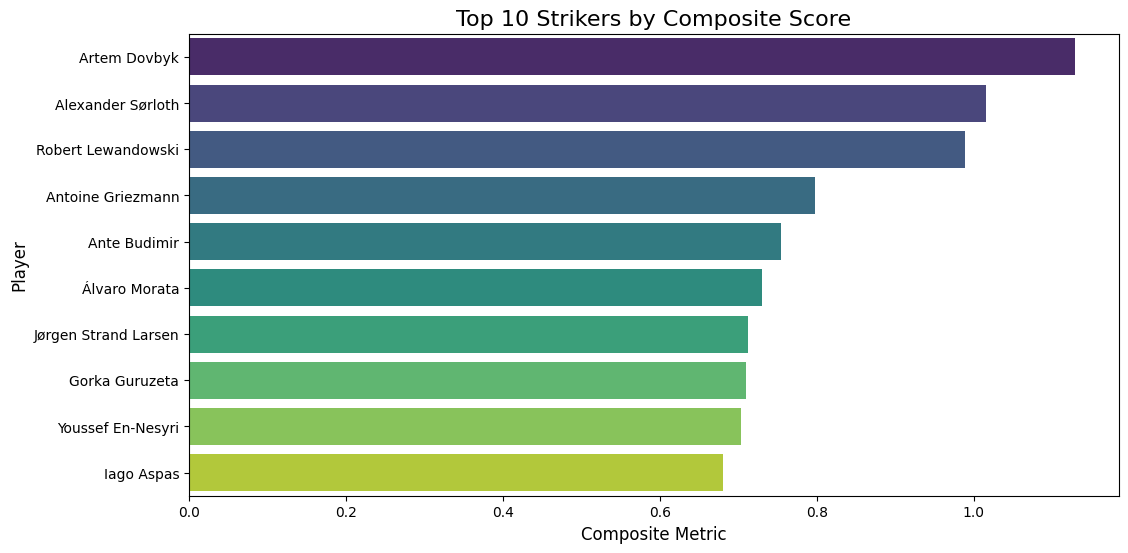

In [ ]:
# Sort by composite score and take the top 10 players
top_strikers = centerforwards_df.sort_values('composite_metric', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='composite_metric', y='player', data=top_strikers, palette='viridis')
plt.title('Top 10 Strikers by Composite Score', fontsize=16)
plt.xlabel('Composite Metric', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.show()


In my early Exploratory data analysis I found out features that were important for forwards and on Prof.Ricky Sethi recommendation starting working on a composite score that combined xG, goals and other features. Using weights to certain features I computed scores for each center-forward(striker) and found out the top 10 strikers in the league.

## Composite Scores for Midfielders and Defenders:

I created composite scores for Midfielders and Defenders the same way by assigning weights to features. For example,


In [ ]:
weights = {
    'goals': 0.2,  # Lower for midfielders
    'assists': 0.2,  # Assists are still key
    'xg': 0.15,  # xG can be critical for attacking midfielders
    'passes': 0.05,  # Slightly more importance
    'passes_pct': 0.05,  # Passing accuracy matters
    'minutes': 0.03,  # Consistency
    'progressive_carries_standings': 0.1,
    'tackles_won': 0.12, # Important stats for central and defensive midfielders
    'blocks': 0.08,
    'blocked_shots': 0.05,
    'interceptions': 0.15,
    'take_ons_won': 0.1,  # Ability to beat players
    'carries_progressive_distance': 0.1,
    'pass_xa': 0.15,  # Key passes for assists
    'assisted_shots': 0.08,
    'passes_into_final_third': 0.15,
    'crosses_into_penalty_area': 0.08,
    'carries': 0.1,
    'miscontrols': 0.1,  # Reduced penalty
    'dispossessed': 0.1
}

For Defenders the most important feature that i found out was interceptions,blocks, clearances and tackles. Accordingly i adjusted the weights and found the Composite_Score for all Defenders

# **Model Implementation and Analysis:**
Narrowing Down the Scope
Initially, the project aimed to comprehensively predict both player performance at a new club and how player attributes influenced the success of the team. However, the scope was too broad for a single analysis. Through exploratory data analysis (EDA) and initial modeling, I narrowed the scope to focus on:

Player Success Prediction: Measuring a player's performance at their new club using a composite metric derived from goals, assists, minutes played, and team statistics (e.g., possession, xG).
Team Success Influence: Understanding how a team's performance metrics contribute to their success metrics, like points, league ranking, and goals scored.
This focus allowed for a more coherent and manageable analysis by clearly dividing individual player performance and team impact as separate but related outcomes.


# **Player Success Model:**

I implemented the XGBoost algorithm as a regressor. The model was trained using the selected features and the target composite score. The hyperparameters used were:

Objective: reg:squarederror
Number of estimators: 100
Learning rate: 0.1

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

features = ['xg','goals','npxg_xg_assist','passes', 'passes_pct','assists_standings', 'tackles', 'tackles_won','interceptions', 'challenges','blocks','blocked_shots',
            'blocked_passes','interceptions','passes_into_final_third','progressive_carries_standings','pass_xa','assisted_shots','crosses_into_penalty_area',
            'touches','take_ons_won','carries_progressive_distance','miscontrols','minutes', 'position_standings','passes_total_distance','dispossessed']
target = 'composite_score'  # Assume you're predicting a composite score for performance

midfielder_data_df['position_standings'] = midfielder_data_df['position_standings'].astype('category')

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['challenges', 'progressive_carries_standings', 'carries_progressive_distance', 'passes', 'touches', 'minutes', 'passes_total_distance']),
        ('cat', OneHotEncoder(), ['position_standings'])  # Encoding the position column
    ])

# Create XGBoost model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1,enable_categorical=True))
])

# Train-test split
X = midfielder_data_df[features]
y = midfielder_data_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


After training the model, the performance on the test data was evaluated using two key metrics:

R-squared: The model achieved an

**R-squared value: 0.8796**,  indicating a high degree of fit, with the model explaining 87.96% of the variance in the target variable.


**Mean Absolute Error (MAE):  0.0400**,  which means the average absolute error between the predicted and actual scores was very small.

### Learning Curve of the model:

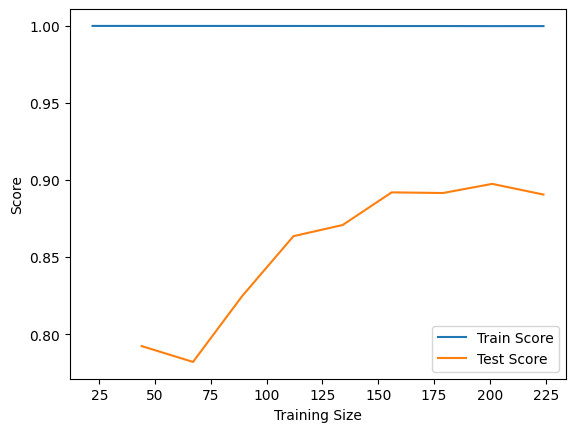

## Feature Importance for Attacking midfielders:

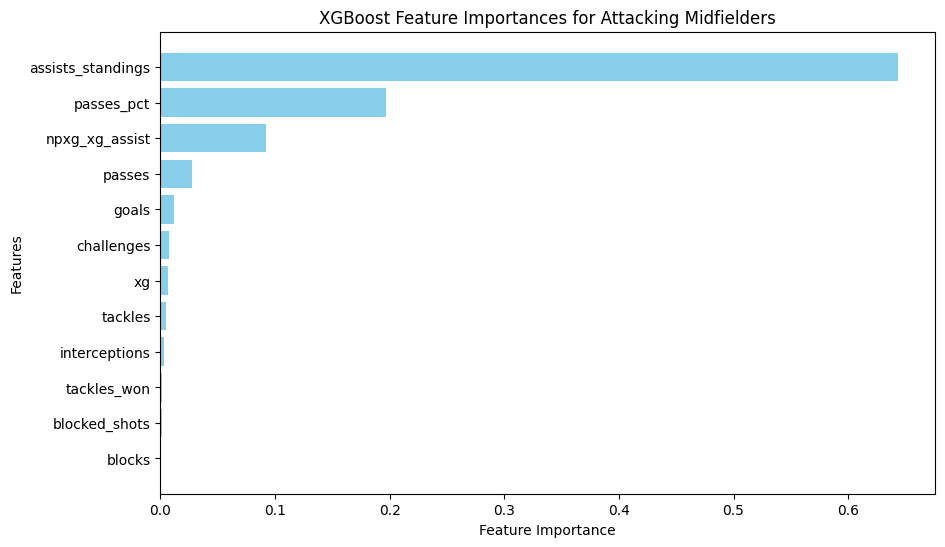

High Importance Features:


1.   Assists (assists_standings): This feature has the highest weight (0.6438), indicating that it is the most influential predictor of the player's composite performance score. Assists are often a crucial measure of a player's contribution to a team's offensive performance, which aligns with its high importance.
2.   Pass Completion Percentage (passes_pct): With a weight of 0.1965, this feature is also quite significant. Pass completion is fundamental to assessing a player’s technical ability and their effectiveness in controlling possession, which is critical for overall team performance.
3.  Non-Penalty Expected Goals + Expected Assists (npxg_xg_assist): This feature (0.0922) is an important measure of a player's offensive contributions, excluding penalties, and also indicates how well they create scoring opportunities.


Moderate Importance Features:

1.  Passes (passes): This feature (0.0281) is moderately important. The volume of passes a player completes is often indicative of their involvement in building plays and controlling the game.
2.  Goals (goals): The weight of 0.0123 reflects its moderate importance. Goals are an important part of a player's scoring contributions but are not as critical in this case as assists or expected goals.


Low Importance Features:

1.  Tackles, Tackles Won, Interceptions, Challenges: These defensive metrics have low weights (ranging from 0.0018 to 0.0079), suggesting they are not as influential in predicting the composite score. While important for a player’s defensive contribution, they seem to play a smaller role in this model's performance.
2.  Blocks, Blocked Shots: With weights of 0.0005 and 0.0017, these features have minimal influence on the predictions. Defensive statistics like blocked shots may have a lower direct impact on overall performance in the context of your model.

## **Result:**

In this analysis, we used XGBoost to predict player performance in football, evaluating the model using key metrics such as R-squared and Mean Absolute Error (MAE). The resulting **R-squared of 0.8796 and MAE of 0.0400** indicate that the model achieved strong predictive power, effectively capturing the relationships between the features and player performance.

Further, the learning curve analysis indicated that the model showed stable performance with increasing training data, confirming that the model is not overfitting and can generalize well.

While the model performed well, improvements can still be made through hyperparameter tuning, feature engineering, or exploring other machine learning algorithms.

Overall, the XGBoost model proves to be a robust approach for football performance prediction, offering valuable insights into player impact based on various performance metrics.

# Team Success Model:

We applied two classification models to predict whether a team’s performance improves or not:
 1.  Logistic Regression : As a baseline model for binary classification.
 2.  Random Forest Classifier : A more complex model that uses an ensemble of decision trees to provide predictions.

I performed the following steps:


*   Data Preprocessing: Combined team statistics and standings data, adding important features such as team performance metrics (previous season rank, points, goal difference) to predict team success in the current season.
*   Model Training and Hyperparameter Tuning: Logistic Regression and Random Forest models were trained using training data. We also performed hyperparameter tuning using GridSearchCV to optimize the Random Forest model's parameters.

*   Model Evaluation: Various evaluation metrics were used, including precision, recall, F1-score, accuracy, and AUC-ROC, to assess the models' performance.


Results:


*   Logistic Regression:

  The Logistic Regression model performed well with an AUC-ROC of 0.89 and an accuracy of 82.6%.The classification report indicated high recall for the "improved" class (0.78), with precision of 1.00, resulting in an F1-score of 0.88 for class 1 (improved teams).The model showed strong performance for the majority class (improved teams), but the precision for class 0 (not improved) was lower.
*   Random Forest Classifier:

  The Random Forest model showed an AUC-ROC of 0.76 and an accuracy of 73.9%.The classification report indicated better precision for the "improved" class (0.93) compared to the recall (0.72), yielding an F1-score of 0.81 for class 1 (improved teams).The precision and recall for the "not improved" class (0.44 and 0.80, respectively) were not ideal, leading to a lower F1-score of 0.57 for class 0.

Through hyperparameter tuning using GridSearchCV, the model found the best parameters, but its overall performance was not as strong as that of Logistic Regression, particularly in predicting the "not improved" teams.


# Visualizations:

Confusion Matrix: A heatmap of confusion matrices for both models was generated to visualize how well the models classify the two classes ("improved" vs "not improved").

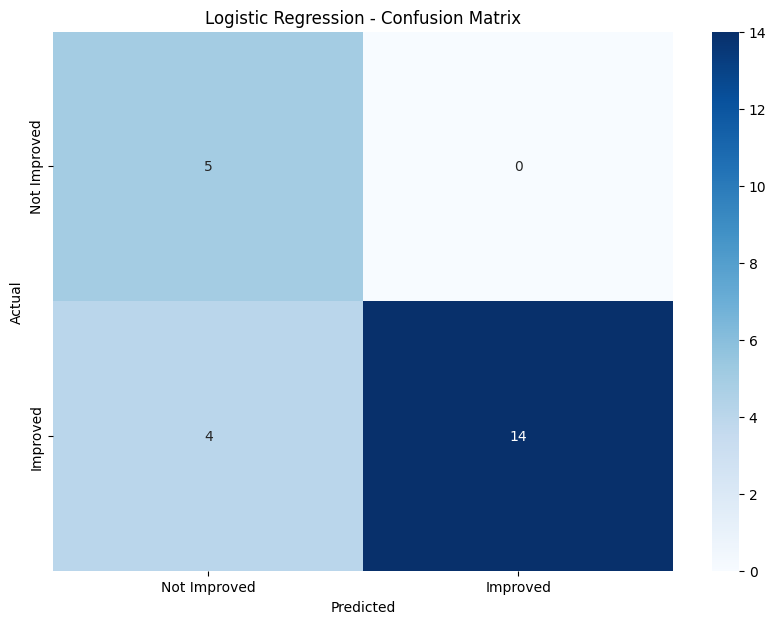


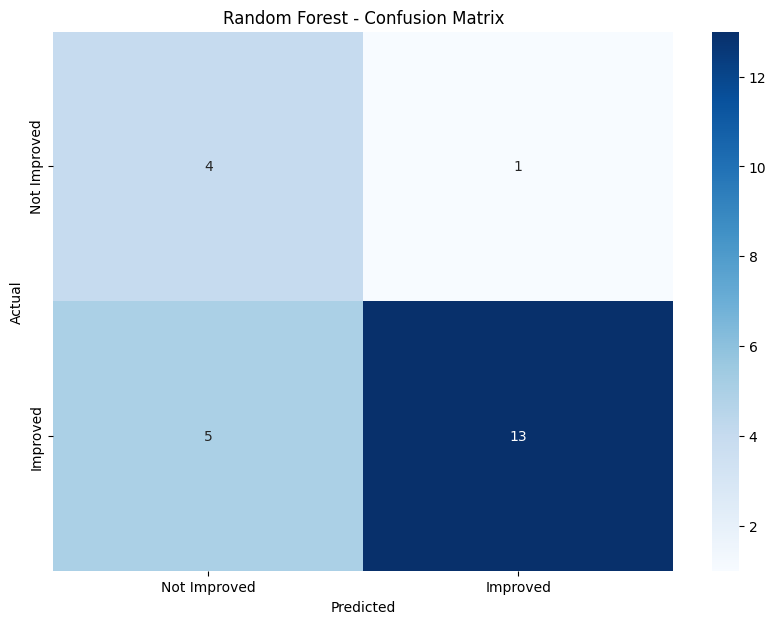
    





ROC Curves: ROC curves were plotted to compare the trade-offs between True Positive Rate and False Positive Rate for both models.

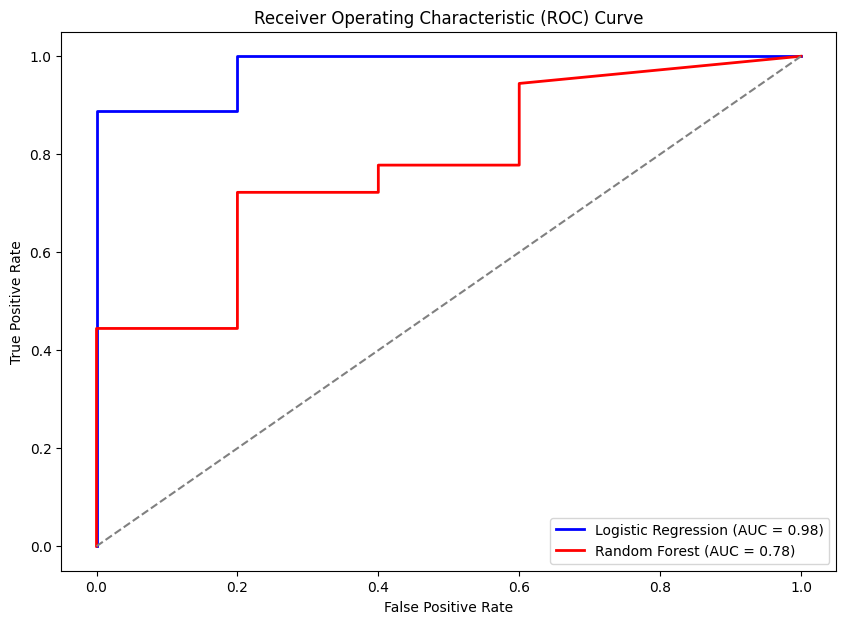

Precision-Recall Curves: These curves were used to analyze the models' precision and recall across different thresholds.

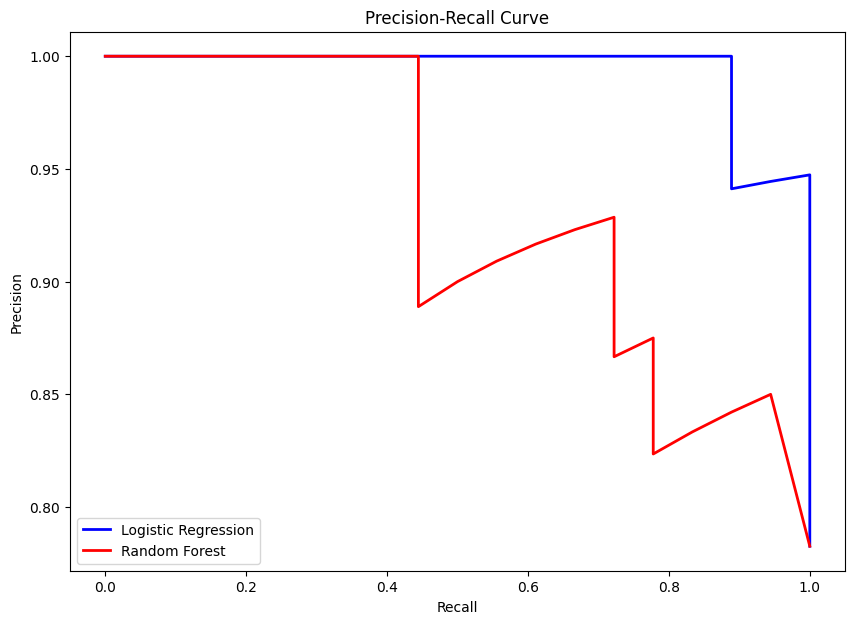

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Prepare the data
# Feature columns: We'll use various team performance metrics as features
features = [
    'goals_for', 'goals_against', 'goal_diff', 'xg_x', 'shots', 'xg_diff', 'shots_on_target',
    'possession', 'progressive_passes_y', 'passes_pct', 'shots','previous_season_rank',
    'previous_season_goal_diff', 'previous_season_points'
]

# Target variable: team_improvement
X = combined_df[features]
y = combined_df['team_improvement']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model (Baseline)
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluation Metrics for Logistic Regression
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Random Forest Classifier Model (Final Model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics for Random Forest Classifier
print("\nRandom Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


**Output:**

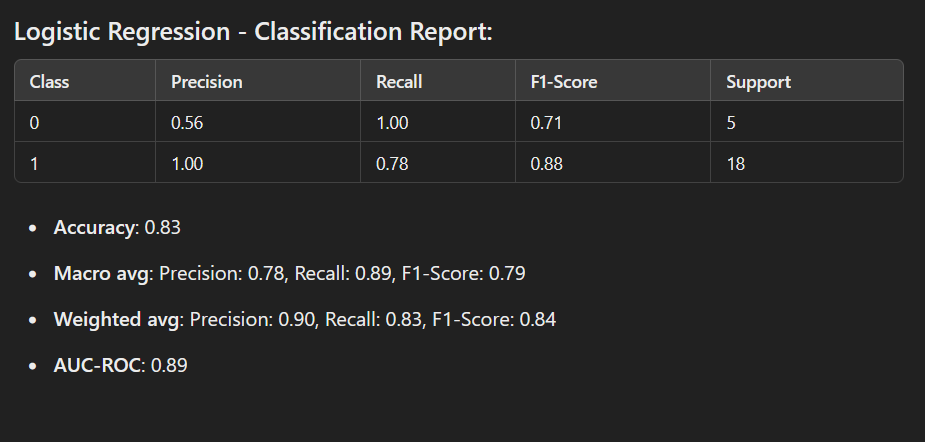

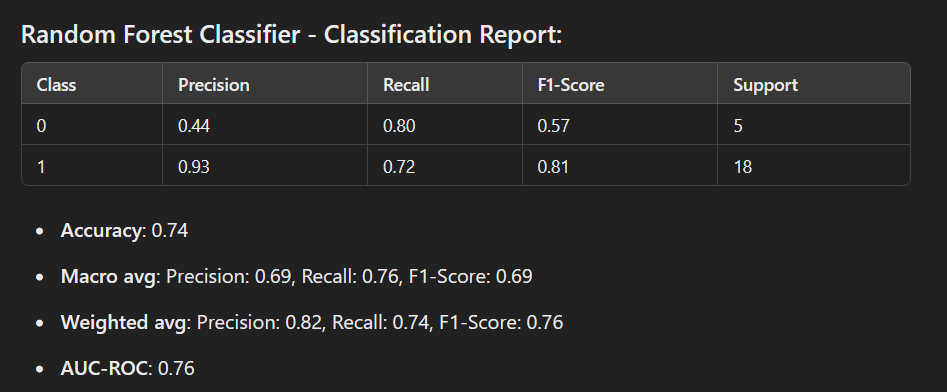

# Result:

Logistic Regression was found to be more effective in terms of overall accuracy and AUC-ROC, particularly for predicting the "improved" teams.

Random Forest Classifier, despite hyperparameter optimization, had a lower accuracy and AUC-ROC, but showed stronger precision for predicting teams that improve, though it struggled more with predicting the "not improved" teams.

The AUC-ROC scores for both models suggest that both models are performing better than random guessing, with Logistic Regression having a slight edge.

The Logistic Regression model outperformed the Random Forest Classifier in terms of overall accuracy and AUC-ROC. The Random Forest model showed promise, especially for predicting "improved" teams, but its performance could be further optimized.

# Conclusion:
**bold text**
The goal of this project was to predict whether a football team's performance improves in a given season based on historical team statistics, including metrics like goals, possession, points, and goal difference. We applied two classification models—Logistic Regression and Random Forest Classifier—to tackle this binary classification problem and assess their ability to predict team performance improvement.

Through careful data preprocessing and model training, we observed that:
### Player Success Model:
1.  I utilized XGBoost, a powerful machine learning algorithm, to predict player performance in football. The model was evaluated using key metrics such as R-squared and Mean Absolute Error (MAE). With an **R-squared of 0.8796** and an **MAE of 0.0400**, the XGBoost model demonstrated strong predictive capabilities, effectively capturing the relationships between various features and player performance.

2.  The learning curve analysis further supported these results, showing that the model's performance remained stable as the training data increased, which indicates that it is neither overfitting nor underfitting. This suggests that the model is capable of generalizing well to new, unseen data.


### Team Success Model:
1.  For Team success based prediction, Logistic Regression emerged as the more effective model, achieving an **accuracy of 82.6%** and an **AUC-ROC of 0.89**. It showed strong performance in predicting teams that improved, with a high recall for the "improved" class, although it struggled with the "not improved" class in terms of precision.
2.  Random Forest Classifier, despite hyperparameter optimization using GridSearchCV, yielded a **lower accuracy (73.9%)** and **AUC-ROC (0.76)**. While it demonstrated good precision for "improved" teams, its performance was less reliable for "not improved" teams.

Key insights from this project included the importance of feature selection and the impact of class imbalance on model performance. Logistic Regression proved to be a strong baseline model, whereas Random Forest showed potential but required further tuning to enhance its predictive power.

Overall, this project demonstrated the potential of using historical team statistics for performance prediction. While the Logistic Regression model provided reliable results, further refinement, including exploring more advanced models and additional features like player-level statistics, could further improve the predictive capabilities of the model. This project serves as a foundation for more sophisticated team performance prediction models in football analytics.